In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.shape

(730, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.size

11680

# Data Cleaning and Preparation

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dropping casual and registered as target variable is cnt, which includes count of total rental bikes including both casual and registered

In [28]:
df = df.drop(["casual", "registered"], axis=1)

#### Dropping instant since its an index which is an extra columns

In [13]:
df = df.drop(["instant"], axis=1)

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df["dteday"] = pd.to_datetime(df["dteday"], dayfirst=True)

In [30]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int32
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [17]:
pd.DataFrame({
    'correct_weekday': df.dteday.dt.weekday,
    'mentioned_weekday': df.weekday
}).head()

,correct_weekday,mentioned_weekday
0,0,6
1,1,0
2,2,1
3,3,2
4,4,3


### Note: Weekday column mentioned in the dataset is not correct, value doesn't match with the weekday calculated from dteday. So replacing weekday with correct values

In [18]:
df.weekday = df.dteday.dt.weekday

In [20]:
pd.DataFrame({
    'correct_month': df.dteday.dt.month,
    'mentioned_weekday': df.mnth
}).head()

,correct_month,mentioned_weekday
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


#### Dropping dteday since day, month and year data exist

In [22]:
df = df.drop(["dteday"], axis=1)

In [31]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [33]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.000304,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000684,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.006080,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.048541,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,3.042009e-04,6.843499e-04,6.079650e-03,-0.048541,1.000000,0.464121,0.042703,0.029929,0.023235,-0.034223,-0.011361,0.076747
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.464121,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.042703,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.029929,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.023235,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.034223,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [34]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [35]:
numerical_cols = ["temp", "atemp", "hum", "windspeed"]
categorical_cols = ["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
target_col = "cnt"

#### Check for outliers

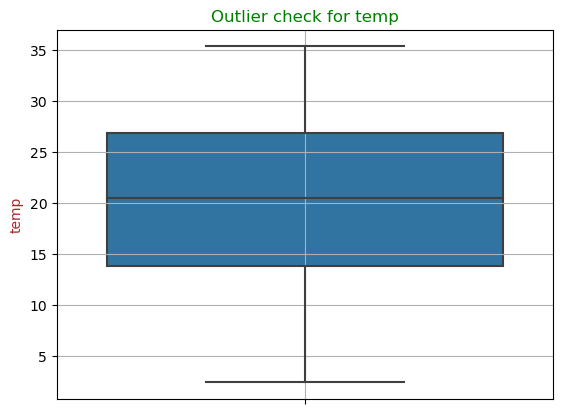

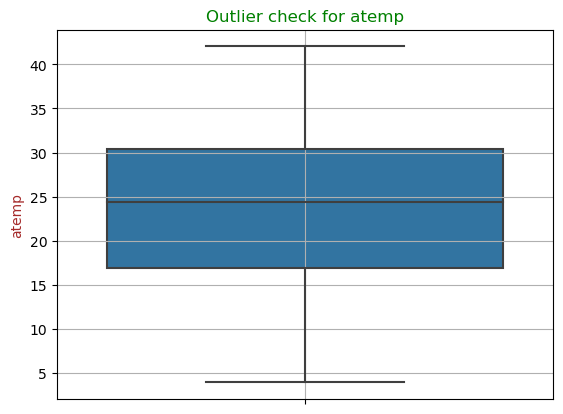

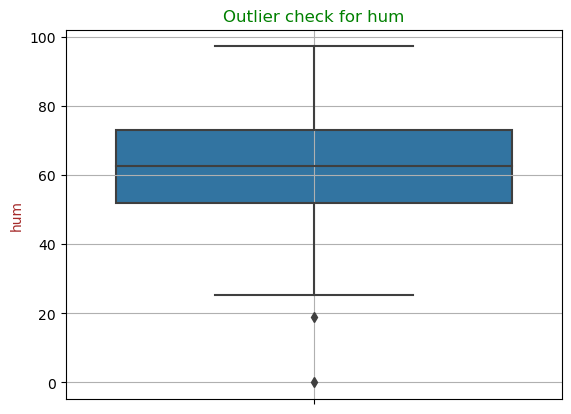

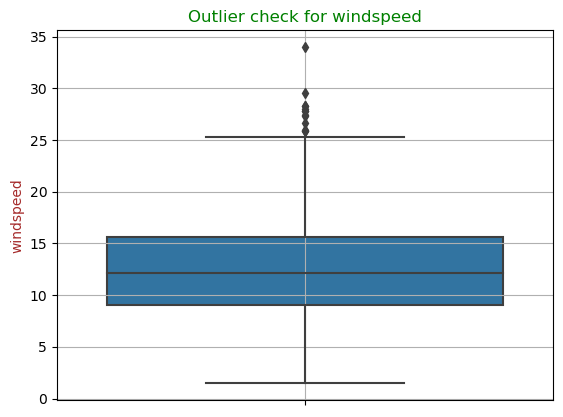

In [36]:
for col in numerical_cols:
    sns.boxplot(y=col, data=df)
    plt.title(f"Outlier check for {col}", color="green")
    plt.ylabel(f"{col}", color="brown")
    plt.grid(True)
    plt.show()

This chart contains four vertical box plots, each labeled for different variables: temp, atemp, hum, and windspeed. Below is a summary of the analysis for each variable:

1. Temperature (temp)
- Range: The temperature values range between approximately 13 and 27.5.
- Outliers: No significant outliers are observed in the data.
- Spread: The data is fairly evenly distributed, with no extreme deviation from the interquartile range (IQR).

2. Apparent Temperature (atemp)
- Range: The apparent temperature values range from about 17 to 30.5.
- Outliers: No major outliers are detected.
- Spread: The box plot suggests a fairly evenly distributed, with no extreme deviation from the interquartile range, but again there is no strong presence of outliers.
3. Humidity (hum)
- Range: Humidity values lie between around 51 and 75.
- Outliers: A few outliers are visible below the lower whisker.
- Spread: The data distribution for humidity appears tight, with the majority of data points concentrated in the upper half of the range.
4. Windspeed (windspeed)
- Range: Windspeed ranges between 9 and 16.
- Outliers: Several outliers exist, primarily above the upper whisker.
- Spread: The windspeed values have a smaller IQR, with outliers extending towards the upper end of the distribution.
<br>
<br>
Observations:
<br>
- Outliers: Outliers are most noticeable for windspeed and humidity, while temp and atemp show no major outliers.
- Spread: The interquartile ranges for all variables except windspeed show a moderate to wide spread, with data points well distributed within their respective ranges.
<br>
<br>
Conclusion:
<br>
- Outliers were observed in the humidity (hum) and windspeed (windspeed) variables, with no significant outliers in temperature (temp) and apparent temperature (atemp).
- Not removing outliers from the dataset as they may represent natural variations or rare but important observations that could provide valuable insights.
- By retaining these outliers, the analysis will reflect the complete dataset, capturing all potential trends and variations, even those occurring at the extreme ends of the data distribution. This approach ensures that no potentially relevant information is discarded.

#### Updating categorical column values

In [37]:
df.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace = True)

df.mnth.replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                  7: "Jul", 8: "Aug", 9: "Sept", 10: "Oct", 11: "Nov", 12: "Dec"}, inplace = True)

df.weekday.replace({0: "Mon", 1: "Tue",2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}, inplace = True)

df.weathersit.replace({1: "Clear Cloud", 2: "Mist Cloud", 3: "Light Snow / Rain", 4: "Heavy Snow / Rain"}, inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist Cloud,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist Cloud,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear Cloud,9.305237,11.46350,43.6957,12.522300,1600
